In [26]:
%matplotlib inline
import pandas as pd

In [5]:
gtd = pd.read_csv('C:\\Users\\Caroline\\Documents\\School\\Programming for Data Science\\Term Project\\whole_df.csv', low_memory=False, index_col=1).drop(['Unnamed: 0'], axis = 1)

features = ['iyear', 'extended', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'weaptype1', 'weaptype1_txt','nkill', 'nwound', 'property']

gtd_features = gtd[features]

gtd_features.head()

,iyear,extended,country_txt,region_txt,city,latitude,longitude,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,weaptype1,weaptype1_txt,nkill,nwound,property
eventid,,,,,,,,,,,,,,,,,,,,
197000000001,1970,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0.0,0,1,0,1,Assassination,14,Private Citizens & Property,13,Unknown,1.0,0.0,0
197000000002,1970,0,Mexico,North America,Mexico city,19.432608,-99.133207,0.0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),13,Unknown,0.0,0.0,0
197001000001,1970,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0.0,0,1,0,1,Assassination,10,Journalists & Media,13,Unknown,1.0,0.0,0
197001000002,1970,0,Greece,Western Europe,Athens,37.983773,23.728157,0.0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),6,Explosives/Bombs/Dynamite,NaN,NaN,1
197001000003,1970,0,Japan,East Asia,Fukouka,33.580412,130.396361,-9.0,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),8,Incendiary,NaN,NaN,1


In [8]:
#make attacktype1_txt the columns and sum(success) the values

#maybe start with df that just has distinct country_txt, attacktype, sum(success)b

#per_country_per_5yrs = pd.pivot_table(gtd_bubble, index =['country_txt', '5year'], aggfunc=sum).drop('iyear', 1)

dot_plot_features = ['country_txt', 'attacktype1_txt', 'success', 'nkill']
gtd_dot = gtd[dot_plot_features]
gtd_dot.head()

,country_txt,attacktype1_txt,success,nkill
eventid,,,,
197000000001,Dominican Republic,Assassination,1,1.0
197000000002,Mexico,Hostage Taking (Kidnapping),1,0.0
197001000001,Philippines,Assassination,1,1.0
197001000002,Greece,Bombing/Explosion,1,NaN
197001000003,Japan,Facility/Infrastructure Attack,1,NaN


In [9]:
per_country_per_attack_type = pd.pivot_table(gtd_dot, index=['country_txt', 'attacktype1_txt'], aggfunc=sum)

per_country_per_attack_type.head()

nkill  success
country_txt attacktype1_txt                                  
Afghanistan Armed Assault                    8786.33     2061
            Assassination                    1202.83      437
            Bombing/Explosion               12917.01     4662
            Facility/Infrastructure Attack    138.00      281
            Hijacking                          29.00       10

In [10]:
#now need to pivot the attack type to be columns

#we actually don't want the data to be exactly like it was in the seaborn script b/c we'll only display one at a time
attacktype = 'Armed Assault'
per_country_per_attack_type = per_country_per_attack_type.xs(attacktype, level='attacktype1_txt')
per_country_per_attack_type.head()

,nkill,success
country_txt,,
Afghanistan,8786.33,2061
Albania,16.00,11
Algeria,6368.00,898
Andorra,NaN,1
Angola,1785.00,121


In [ ]:
per_country_per_attack_type = per_country_per_attack_type.drop('nkill', 1)

In [18]:
per_country_per_attack_type.columns = [attacktype + ' Attacks']
per_country_per_attack_type.head()

,Armed Assault Attacks
country_txt,
Afghanistan,2061
Albania,11
Algeria,898
Andorra,1
Angola,121


In [19]:
#Need to move index to column

per_country_per_attack_type['Country'] = per_country_per_attack_type.index
per_country_per_attack_type.head()

,Armed Assault Attacks,Country
country_txt,,
Afghanistan,2061,Afghanistan
Albania,11,Albania
Algeria,898,Algeria
Andorra,1,Andorra
Angola,121,Angola


In [20]:
per_country_per_attack_type.index = list(range(0, len(per_country_per_attack_type)))

In [22]:
per_country_per_attack_type.head()

,Armed Assault Attacks,Country
0,2061,Afghanistan
1,11,Albania
2,898,Algeria
3,1,Andorra
4,121,Angola


In [35]:
dot[dot['Armed Assault Attacks'] < 1] #it's never null, and it's only 0 for two countries, these do in fact show up at the bottom of the chart

,Armed Assault Attacks,Country
16,0,Belize
35,0,Czech Republic


In [ ]:
#Divide by region
#

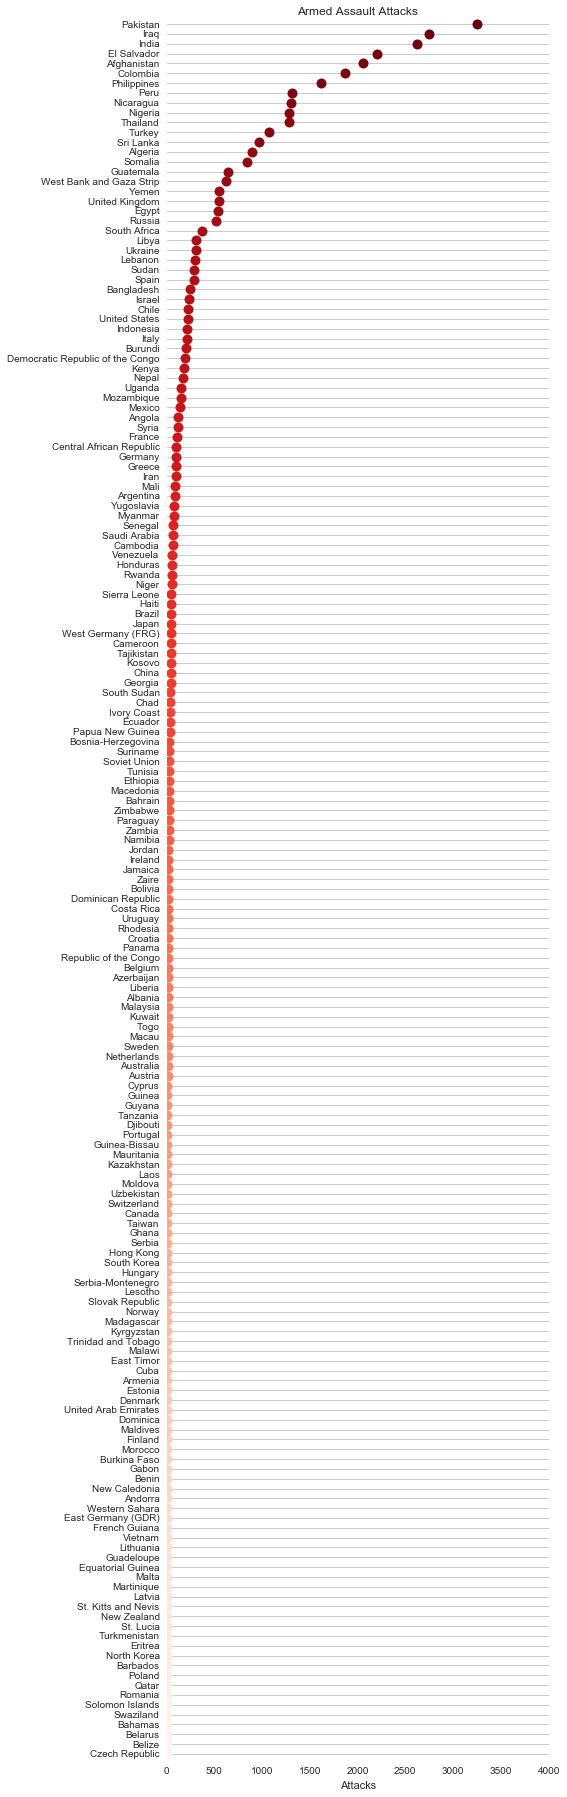

In [36]:
# is the lack of originality a problem here?
#maybe make it so that it shows the top 20 or something?

import seaborn as sns
sns.set(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(dot.sort_values('Armed Assault Attacks', ascending=False),
                 x_vars='Armed Assault Attacks', y_vars=['Country'],
                 size=25, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 4000), xlabel="Attacks", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['Armed Assault Attacks']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True) #need to drop instances where attacks are 0